# Case Study

1. Mengidentifikasi produk teratas berdasarkan total pendapatan transaksi per hari.
2. Mendeteksi anomali, seperti penurunan atau peningkatan tajam dalam jumlah transaksi untuk produk tertentu.
3. Mengidentifikasi kota atau provinsi yang paling menguntungkan berdasarkan total pendapatan transaksi.

# Objective
membantu klien memahami perilaku pengguna dengan lebih baik dan mengidentifikasi peluang peningkatan berdasarkan data transaksi, seperti produk teratas, anomali transaksi, dan wilayah paling menguntungkan.

# Import Library

In [1]:
# Libary Data Loading
import pandas as pd
import numpy as np

# Libary Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
# Menampilkan dataset 
df = pd.read_csv('ecommerce-session-bigquery.csv')
display(df.head(),df.tail())

,fullVisitorId,channelGrouping,time,country,city,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,...,itemQuantity,itemRevenue,transactionRevenue,transactionId,pageTitle,searchKeyword,pagePathLevel1,eCommerceAction_type,eCommerceAction_step,eCommerceAction_option
0,2515546493837534633,Organic Search,966564,Taiwan,(not set),NaN,NaN,1567.0,82.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
1,9361741997835388618,Organic Search,157377,France,not available in demo dataset,NaN,NaN,321.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
2,7313828956068851679,Referral,228279,United States,San Francisco,NaN,NaN,927.0,11.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
3,6036794406403793540,Organic Search,1615618,United States,Boulder,NaN,NaN,1616.0,13.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
4,7847280609739507227,Organic Search,37832,Canada,not available in demo dataset,NaN,NaN,1222.0,45.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN


,fullVisitorId,channelGrouping,time,country,city,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,...,itemQuantity,itemRevenue,transactionRevenue,transactionId,pageTitle,searchKeyword,pagePathLevel1,eCommerceAction_type,eCommerceAction_step,eCommerceAction_option
9995,8518740059623315737,Referral,83144,United States,Ann Arbor,NaN,NaN,561.0,18.0,NaN,...,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9996,1592171014215970461,Organic Search,302378,Colombia,Bogota,NaN,NaN,365.0,7.0,NaN,...,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9997,6776942687101397292,Affiliates,41387,Israel,not available in demo dataset,NaN,NaN,107.0,7.0,NaN,...,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9998,3008082643543388126,Organic Search,28613,Canada,Montreal,NaN,NaN,93.0,11.0,NaN,...,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9999,4307804717807925609,Organic Search,407285,United States,not available in demo dataset,NaN,NaN,455.0,21.0,NaN,...,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN


In [3]:
# Melihat informasi kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fullVisitorId            10000 non-null  uint64 
 1   channelGrouping          10000 non-null  object 
 2   time                     10000 non-null  int64  
 3   country                  10000 non-null  object 
 4   city                     10000 non-null  object 
 5   totalTransactionRevenue  619 non-null    float64
 6   transactions             628 non-null    float64
 7   timeOnSite               9713 non-null   float64
 8   pageviews                9999 non-null   float64
 9   sessionQualityDim        19 non-null     float64
 10  date                     10000 non-null  int64  
 11  visitId                  10000 non-null  int64  
 12  type                     10000 non-null  object 
 13  productRefundAmount      0 non-null      float64
 14  productQuantity        

-   Dataset terdiri dari 10000 baris dan 32 kolom.
-   Terdapat 14 fitur yang valuesnya bertipe float, 7 bertype integer dan 6 bertype Object
-   Masih terdapat missing values.

In [4]:
# Mengecek statistik sederhana dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fullVisitorId,10000.0,4.538050e+18,3.038982e+18,1.664653e+14,1.701094e+18,4.449181e+18,7.170959e+18,9.994767e+18
time,10000.0,3.248462e+05,5.647221e+05,0.000000e+00,4.252400e+04,1.357180e+05,3.542545e+05,1.089403e+07
totalTransactionRevenue,619.0,2.103635e+08,5.656026e+08,3.530000e+06,5.508000e+07,9.542000e+07,1.866600e+08,6.831960e+09
transactions,628.0,1.050955e+00,2.890049e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00
timeOnSite,9713.0,7.201192e+02,9.679977e+02,1.000000e+00,1.640000e+02,3.830000e+02,8.980000e+02,1.502000e+04
pageviews,9999.0,2.214211e+01,2.663137e+01,1.000000e+00,7.000000e+00,1.400000e+01,2.700000e+01,4.290000e+02
sessionQualityDim,19.0,5.021053e+01,3.248175e+01,1.000000e+00,1.950000e+01,6.200000e+01,7.900000e+01,9.200000e+01
date,10000.0,2.016097e+07,9.067598e+02,2.016080e+07,2.016082e+07,2.016090e+07,2.016092e+07,2.017080e+07
visitId,10000.0,1.473169e+09,2.518655e+06,1.470036e+09,1.471555e+09,1.473019e+09,1.474471e+09,1.501622e+09
productRefundAmount,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Berdasarkan hasil perhitungan statistik sederhana, hampir semua fitur memiliki nilai rata-rata yang jauh dari nilai maksimum, yang artinya kemungkinan data tidak terdistribusi normal sehingga akan dilakukan pengecekan lebih lanjut.

In [5]:
# Persentase missing value
df.isna().sum()/df.shape[0]*100

fullVisitorId                0.00
channelGrouping              0.00
time                         0.00
country                      0.00
city                         0.00
totalTransactionRevenue     93.81
transactions                93.72
timeOnSite                   2.87
pageviews                    0.01
sessionQualityDim           99.81
date                         0.00
visitId                      0.00
type                         0.00
productRefundAmount        100.00
productQuantity             99.55
productPrice                 0.00
productRevenue             100.00
productSKU                   0.00
v2ProductName                0.00
v2ProductCategory            0.00
productVariant               0.00
currencyCode                 3.86
itemQuantity               100.00
itemRevenue                100.00
transactionRevenue         100.00
transactionId              100.00
pageTitle                    0.92
searchKeyword              100.00
pagePathLevel1               0.00
eCommerceActio

Dari data diatas adanya missing value dari kolom
- totalTransactionRevenue 93.81%.
- transactions 93.72%.
- sessionQualityDim 99.81%.
- productRefundAmount 100%.
- productQuantity 99.55%.
- productRevenue 100%.
- itemQuantity 100%.
- itemRevenue  100%.
- transactionRevenue 100%.
- eCommerceAction_option 100%.

Ini nanti akan kita analisa terlebih dahulu untuk mempermudah kita dalam melakukan proses selanjutnya.

In [6]:
# Melihat angka pasti missing value
df.isnull().sum()

fullVisitorId                  0
channelGrouping                0
time                           0
country                        0
city                           0
totalTransactionRevenue     9381
transactions                9372
timeOnSite                   287
pageviews                      1
sessionQualityDim           9981
date                           0
visitId                        0
type                           0
productRefundAmount        10000
productQuantity             9955
productPrice                   0
productRevenue             10000
productSKU                     0
v2ProductName                  0
v2ProductCategory              0
productVariant                 0
currencyCode                 386
itemQuantity               10000
itemRevenue                10000
transactionRevenue         10000
transactionId              10000
pageTitle                     92
searchKeyword              10000
pagePathLevel1                 0
eCommerceAction_type           0
eCommerceA

Angka ini konsisten sesuai dengan persentasi yang kita lakukan tadi di atas

In [7]:
# Melihat isi kolom
df.count()

fullVisitorId              10000
channelGrouping            10000
time                       10000
country                    10000
city                       10000
totalTransactionRevenue      619
transactions                 628
timeOnSite                  9713
pageviews                   9999
sessionQualityDim             19
date                       10000
visitId                    10000
type                       10000
productRefundAmount            0
productQuantity               45
productPrice               10000
productRevenue                 0
productSKU                 10000
v2ProductName              10000
v2ProductCategory          10000
productVariant             10000
currencyCode                9614
itemQuantity                   0
itemRevenue                    0
transactionRevenue             0
transactionId                  0
pageTitle                   9908
searchKeyword                  0
pagePathLevel1             10000
eCommerceAction_type       10000
eCommerceA

Dari data diatas masih ada beberapa yang memiliki missing value yang menyebabkan nilai data tidak sama dengan kolom yang lain.

In [8]:
# Duplikasi data
df1 = df.copy()

df1.head()

,fullVisitorId,channelGrouping,time,country,city,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,...,itemQuantity,itemRevenue,transactionRevenue,transactionId,pageTitle,searchKeyword,pagePathLevel1,eCommerceAction_type,eCommerceAction_step,eCommerceAction_option
0,2515546493837534633,Organic Search,966564,Taiwan,(not set),NaN,NaN,1567.0,82.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
1,9361741997835388618,Organic Search,157377,France,not available in demo dataset,NaN,NaN,321.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
2,7313828956068851679,Referral,228279,United States,San Francisco,NaN,NaN,927.0,11.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
3,6036794406403793540,Organic Search,1615618,United States,Boulder,NaN,NaN,1616.0,13.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
4,7847280609739507227,Organic Search,37832,Canada,not available in demo dataset,NaN,NaN,1222.0,45.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN


**Melihat dan menghapus data duplikat**

In [9]:
# Melihat baris duplikat
duplicates_df = df1[df1.duplicated()]
print("Data duplikat:")
print(duplicates_df)

# Menghapus baris duplikat
dataset1 = df1.drop_duplicates()
print("Dataset setelah menghapus duplikat:")
print(dataset1)

Data duplikat:
Empty DataFrame
Columns: [fullVisitorId, channelGrouping, time, country, city, totalTransactionRevenue, transactions, timeOnSite, pageviews, sessionQualityDim, date, visitId, type, productRefundAmount, productQuantity, productPrice, productRevenue, productSKU, v2ProductName, v2ProductCategory, productVariant, currencyCode, itemQuantity, itemRevenue, transactionRevenue, transactionId, pageTitle, searchKeyword, pagePathLevel1, eCommerceAction_type, eCommerceAction_step, eCommerceAction_option]
Index: []

[0 rows x 32 columns]
Dataset setelah menghapus duplikat:
            fullVisitorId channelGrouping     time        country  \
0     2515546493837534633  Organic Search   966564         Taiwan   
1     9361741997835388618  Organic Search   157377         France   
2     7313828956068851679        Referral   228279  United States   
3     6036794406403793540  Organic Search  1615618  United States   
4     7847280609739507227  Organic Search    37832         Canada   
...  

Dari data diatas tidak ditemukkannya data duplikat ini akan memudahkan kita untuk melakukan proses selanjutnya

**Merubah format date menjadi datetime**

In [10]:
# Merubah type data
df1['date'] = pd.to_datetime(df1['date'], format='%Y%m%d')
df1['date'].head(5)

0   2017-07-21
1   2017-04-13
2   2017-07-27
3   2017-07-31
4   2017-07-28
Name: date, dtype: datetime64[ns]

# **1. Identify top products based on the total transaction revenue per day**

In [11]:
# Melakukan grupby untuk mendapatkan hasil revenue
product_revenue_per_day = df1.groupby(['date', 'v2ProductName'])['totalTransactionRevenue'].sum().reset_index()

# Menampilkan top product per harinya
top_products = product_revenue_per_day.groupby('date')['totalTransactionRevenue'].idxmax()
top_products_df = product_revenue_per_day.loc[top_products]

# Mengurutkan dari tanggal yang lebih dahulu
top_products_df = top_products_df.sort_values('date')

# Menampilkan hasil
top_products_df

,date,v2ProductName,totalTransactionRevenue
2,2016-08-01,Chevron Shopper,144790000.0
13,2016-08-02,Chevron Shopper,191200000.0
26,2016-08-03,Chevron Shopper,0.0
44,2016-08-04,Google Lunch Bag,113850000.0
53,2016-08-05,Chevron Shopper,264780000.0
...,...,...,...
1166,2017-07-26,Metal Texture Roller Pen,67570000.0
1168,2017-07-27,Metal Texture Roller Pen,24710000.0
1169,2017-07-28,Google Women's Short Sleeve Hero Tee Black,0.0
1171,2017-07-31,Metal Texture Roller Pen,0.0


In [12]:
# Menampilkan transaction revenue per day
daily_revenue = df.groupby(['time', 'v2ProductName'])['totalTransactionRevenue'].sum().reset_index()
top_products_per_day = daily_revenue.groupby('time').apply(lambda x: x.nlargest(100, 'totalTransactionRevenue')).reset_index(drop=True)

print("Top products based on total transaction revenue per day:")

# Menampilkan dari yang terbesar
pd.set_option('display.max_columns', None)

# Menampilkan 10 teratas
display(top_products_per_day.head(10))

Top products based on total transaction revenue per day:


,time,v2ProductName,totalTransactionRevenue
0,0,Google Lunch Bag,215000000.0
1,0,Google Canvas Tote Natural/Navy,215000000.0
2,0,Waterproof Gear Bag,145310000.0
3,0,Google Tote Bag,145100000.0
4,0,Google Zipper-front Sports Bag,118490000.0
5,0,Straw Beach Mat,62890000.0
6,0,Speed Zone Air Mesh Tote,0.0
7,0,Latitudes Foldaway Shopper,0.0
8,0,Reusable Shopping Bag,0.0
9,0,SPF-15 Lip Balm,0.0


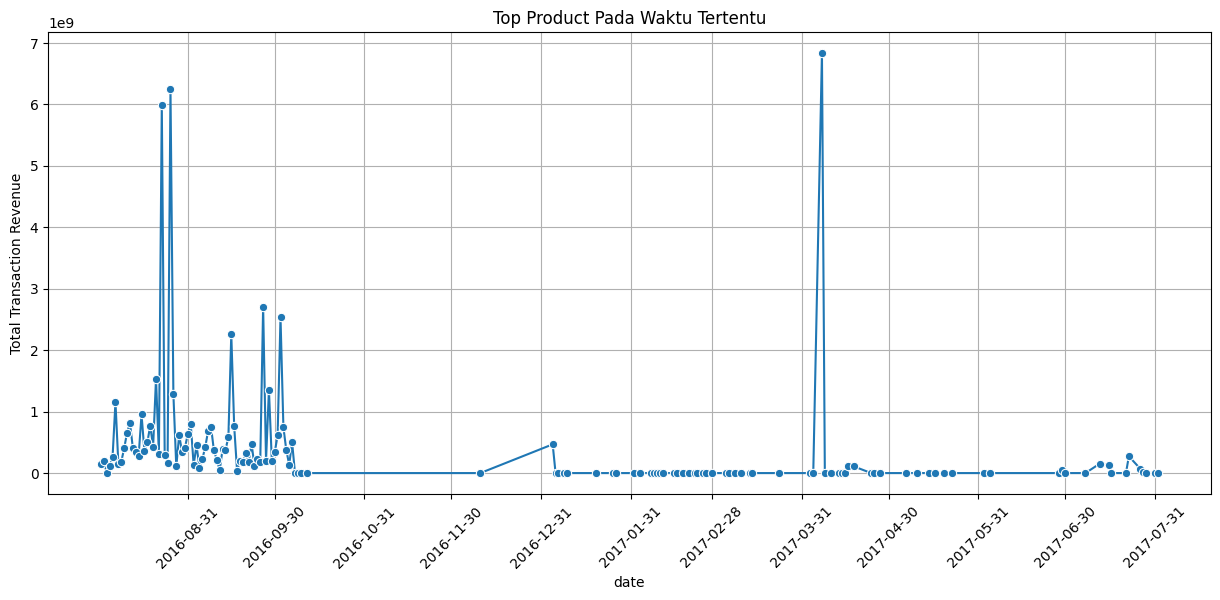

In [13]:
# Menampilkan revenue

plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='totalTransactionRevenue', data=top_products_df, marker='o', linestyle='-')

date_range = pd.date_range(start=top_products_df['date'].min(), end=top_products_df['date'].max(), freq='M')
plt.xticks(ticks=date_range, rotation=45)
plt.ylabel('Total Transaction Revenue')
plt.title('Top Product Pada Waktu Tertentu')
plt.grid(True)

**Kesimpulan:**

Untuk meningkatkan kinerja penjualan produk, diperlukan pendekatan yang komprehensif yang melibatkan analisis data yang mendalam, evaluasi strategi pemasaran, perbaikan kualitas produk, diversifikasi produk, manajemen persediaan yang baik, dan optimasi biaya.

**Rekomendasi:**
1. Evaluasi Strategi Pemasaran:

Evaluasi Kampanye: Evaluasi efektivitas kampanye pemasaran yang telah dilakukan. Apakah kampanye tersebut berhasil meningkatkan penjualan? Jika tidak, apa yang perlu diperbaiki?
Uji Coba Strategi Baru: Coba strategi pemasaran baru yang lebih efektif, seperti penargetan ulang, pemasaran konten, atau influencer marketing.

2. Perbaiki Kualitas Produk:

Feedback Pelanggan: Kumpulkan feedback dari pelanggan untuk mengetahui apa yang mereka suka dan tidak suka dari produk tersebut.
Pengembangan Produk: Lakukan pengembangan produk secara terus-menerus untuk meningkatkan kualitas dan fitur produk.

# **2. Detect any anomalies, such as a sharp decrease or increase in the number of transactions for a specific product**

In [14]:
# Duplikasi data
df2 = df1.copy()

df2.head()

,fullVisitorId,channelGrouping,time,country,city,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,date,visitId,type,productRefundAmount,productQuantity,productPrice,productRevenue,productSKU,v2ProductName,v2ProductCategory,productVariant,currencyCode,itemQuantity,itemRevenue,transactionRevenue,transactionId,pageTitle,searchKeyword,pagePathLevel1,eCommerceAction_type,eCommerceAction_step,eCommerceAction_option
0,2515546493837534633,Organic Search,966564,Taiwan,(not set),NaN,NaN,1567.0,82.0,17.0,2017-07-21,1500643403,PAGE,NaN,NaN,0,NaN,9180781,Suitcase Organizer Cubes,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
1,9361741997835388618,Organic Search,157377,France,not available in demo dataset,NaN,NaN,321.0,8.0,NaN,2017-04-13,1492114470,PAGE,NaN,NaN,0,NaN,9180793,26 oz Double Wall Insulated Bottle,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
2,7313828956068851679,Referral,228279,United States,San Francisco,NaN,NaN,927.0,11.0,63.0,2017-07-27,1501198444,PAGE,NaN,NaN,0,NaN,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
3,6036794406403793540,Organic Search,1615618,United States,Boulder,NaN,NaN,1616.0,13.0,38.0,2017-07-31,1501522359,PAGE,NaN,NaN,0,NaN,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
4,7847280609739507227,Organic Search,37832,Canada,not available in demo dataset,NaN,NaN,1222.0,45.0,53.0,2017-07-28,1501300311,PAGE,NaN,NaN,0,NaN,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN


In [15]:
# Melihat value dari product name
df2['v2ProductName'].value_counts()

v2ProductName
Electronics Accessory Pouch                              906
Google Canvas Tote Natural/Navy                          845
Google Lunch Bag                                         835
Collapsible Shopping Bag                                 690
Google Tote Bag                                          675
                                                        ... 
Google Women's Convertible Vest-Jacket Sea Foam Green      1
Google Women's 1/4 Zip Jacket Charcoal                     1
Nest® Cam Outdoor Security Camera - USA                    1
Google Toddler Short Sleeve T-shirt Yellow                 1
Google Men's 100% Cotton Short Sleeve Hero Tee White       1
Name: count, Length: 84, dtype: int64

In [16]:
# Memilih data untuk di lakukan cutting
df2 = df2[['date', 'v2ProductName', 'totalTransactionRevenue']]

# Melakukan dropna
df2.dropna(inplace=True)

# Menampilkan hasil
df2.isnull().sum()

date                       0
v2ProductName              0
totalTransactionRevenue    0
dtype: int64

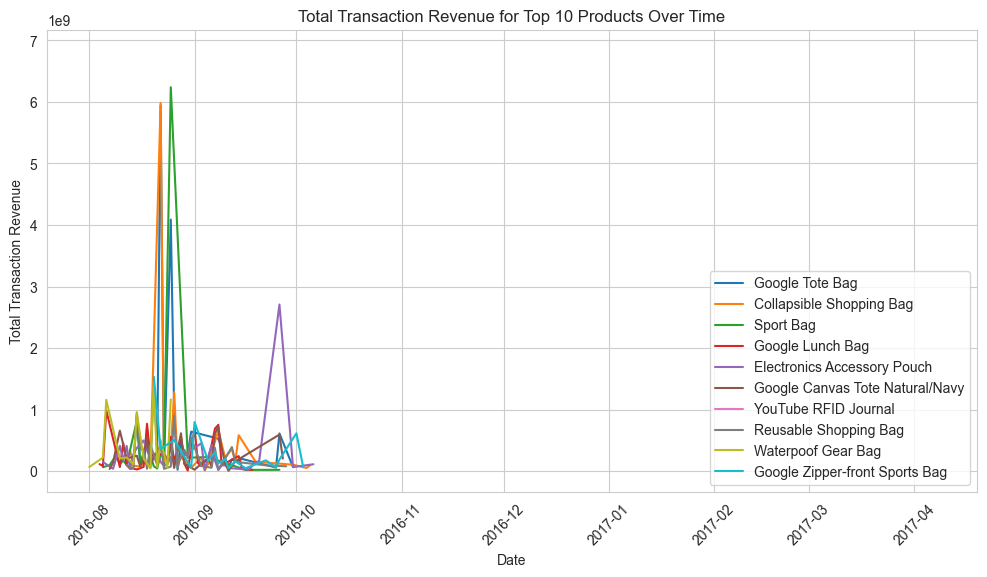

In [18]:
# Hanya menampilkan 10 data teratas saja
top_products = df2.groupby('v2ProductName')['totalTransactionRevenue'].sum().nlargest(10).index
df_top_10 = df2[df2['v2ProductName'].isin(top_products)]

# Melakukan grup data by date and product name and sum totalTransactionRevenue
product_revenue_per_day = df_top_10.groupby(['date', 'v2ProductName'])['totalTransactionRevenue'].sum().reset_index()

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
for product in top_products:
    product_data = product_revenue_per_day[product_revenue_per_day['v2ProductName'] == product]
    plt.plot(product_data['date'], product_data['totalTransactionRevenue'], label=product)

plt.title('Total Transaction Revenue for Top 10 Products Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Untuk meningkatkan kinerja penjualan produk, diperlukan pendekatan yang komprehensif yang melibatkan analisis data yang mendalam, evaluasi strategi pemasaran, pengembangan produk, manajemen persediaan yang baik, dan optimasi biaya. Dengan melakukan langkah-langkah ini, diharapkan dapat meningkatkan penjualan dan profitabilitas produk.

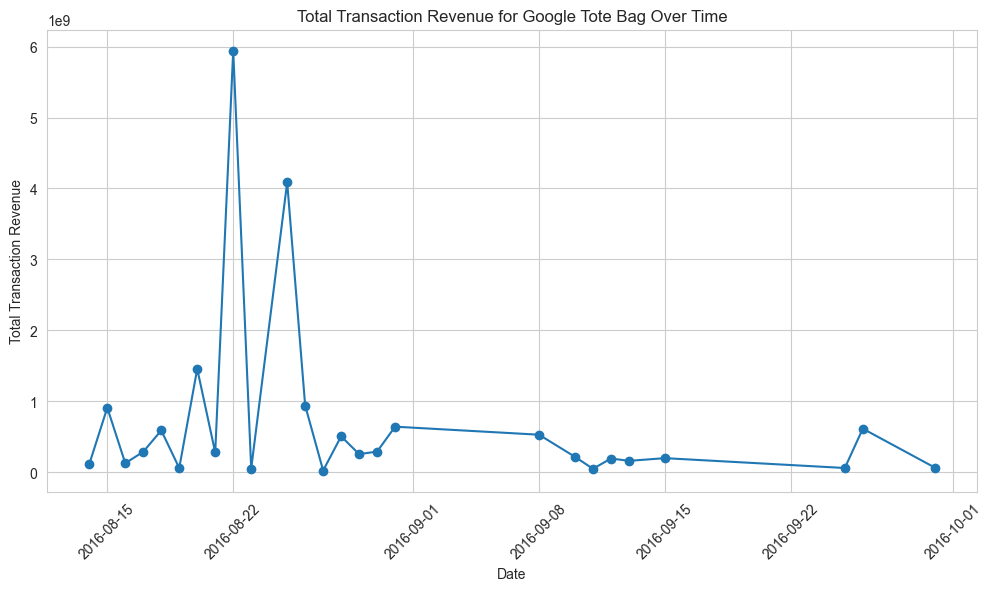

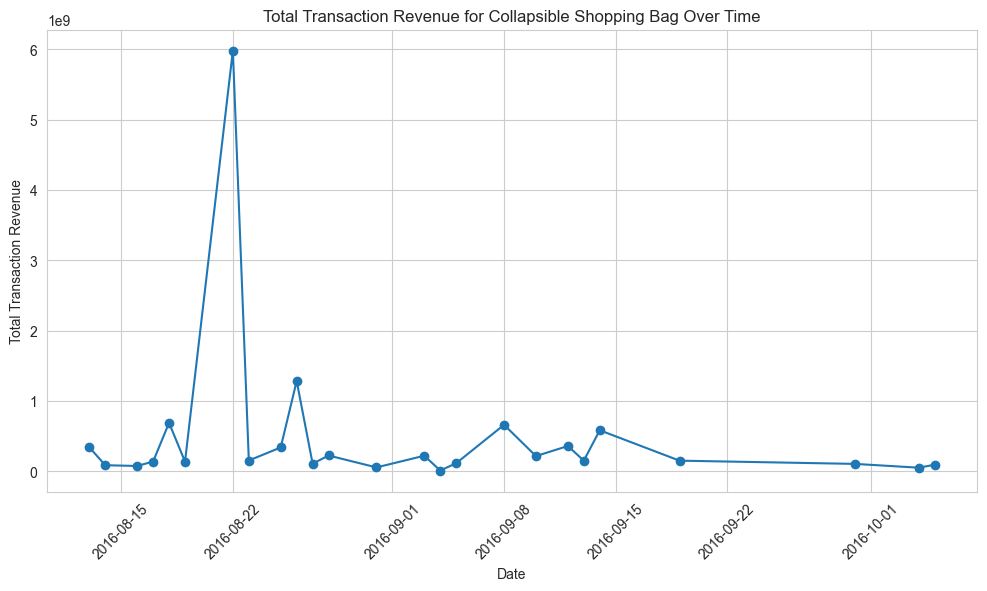

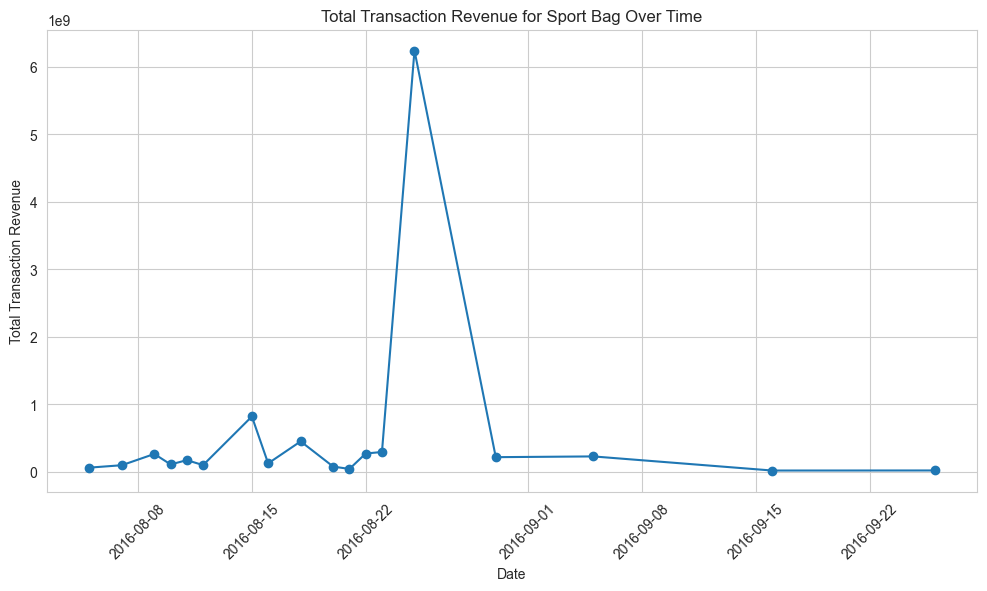

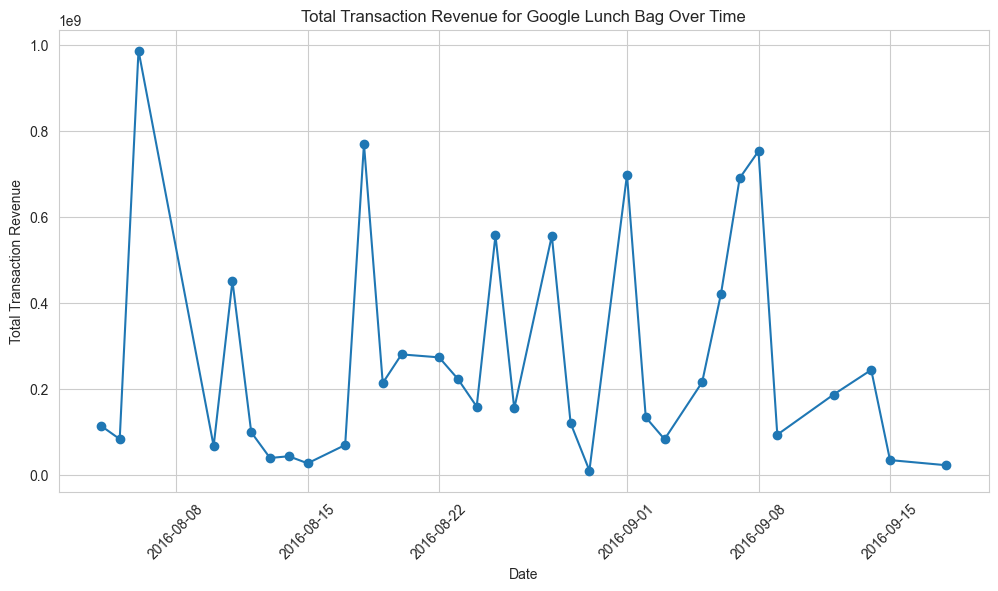

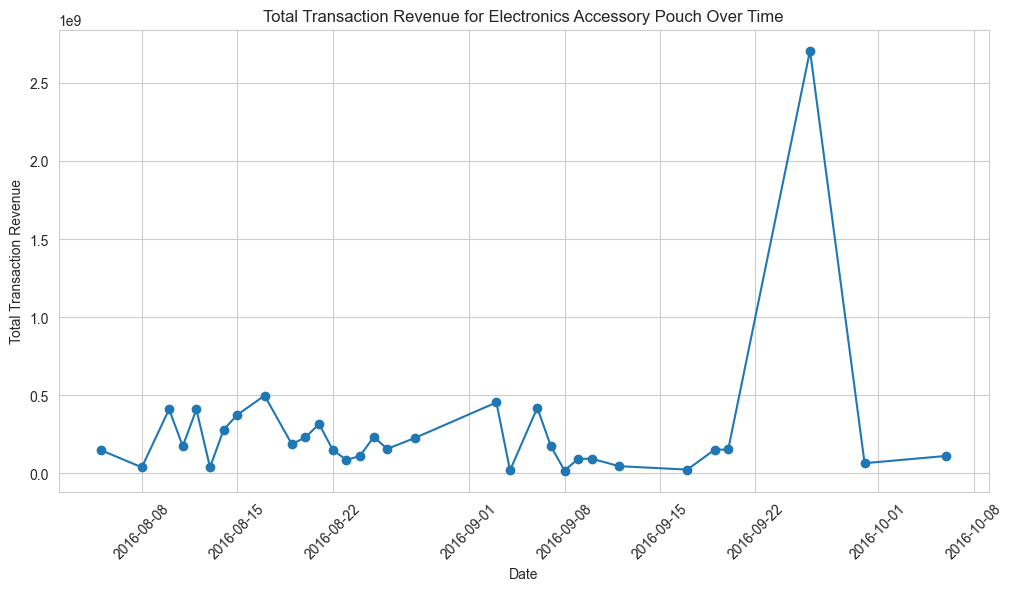

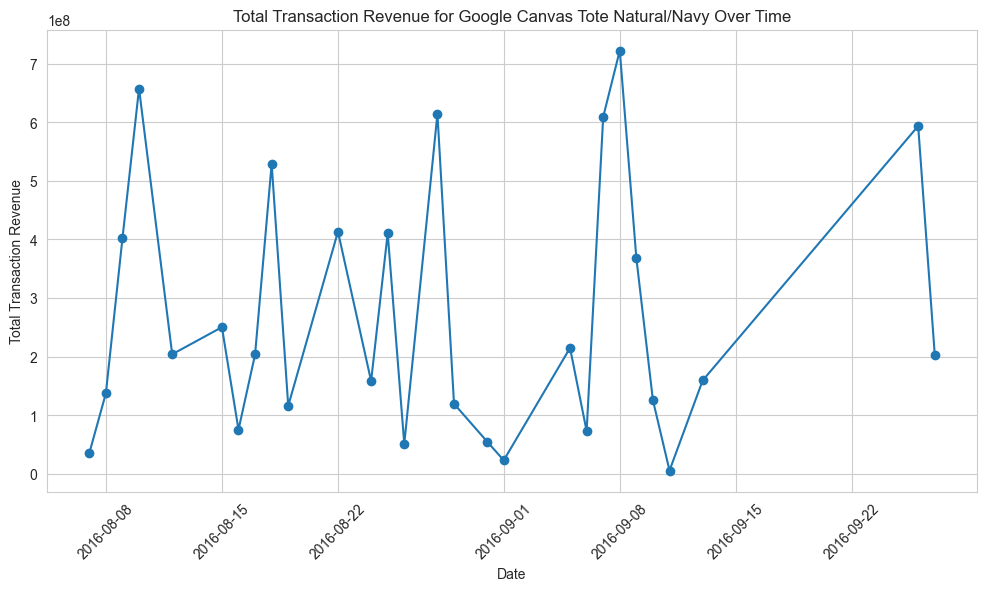

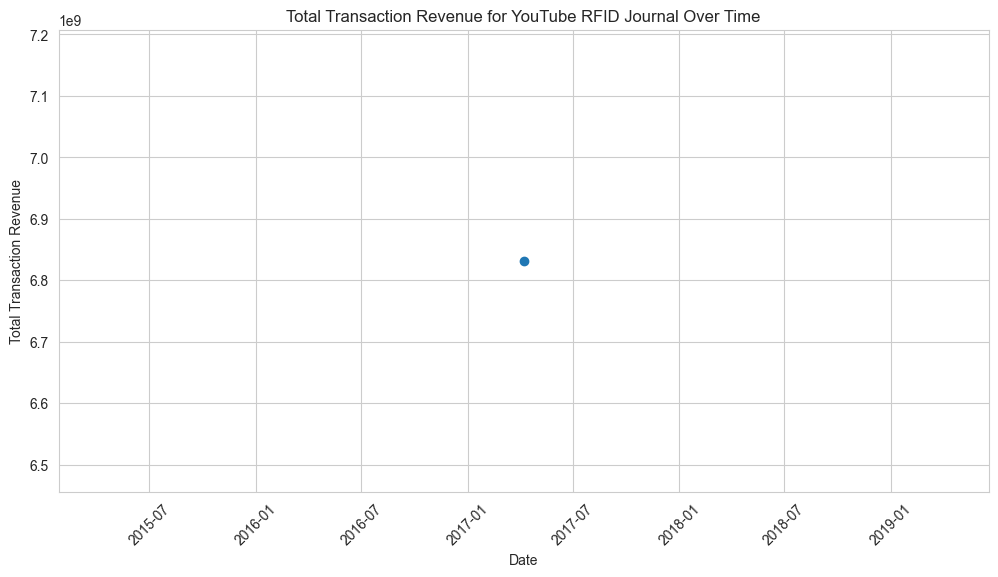

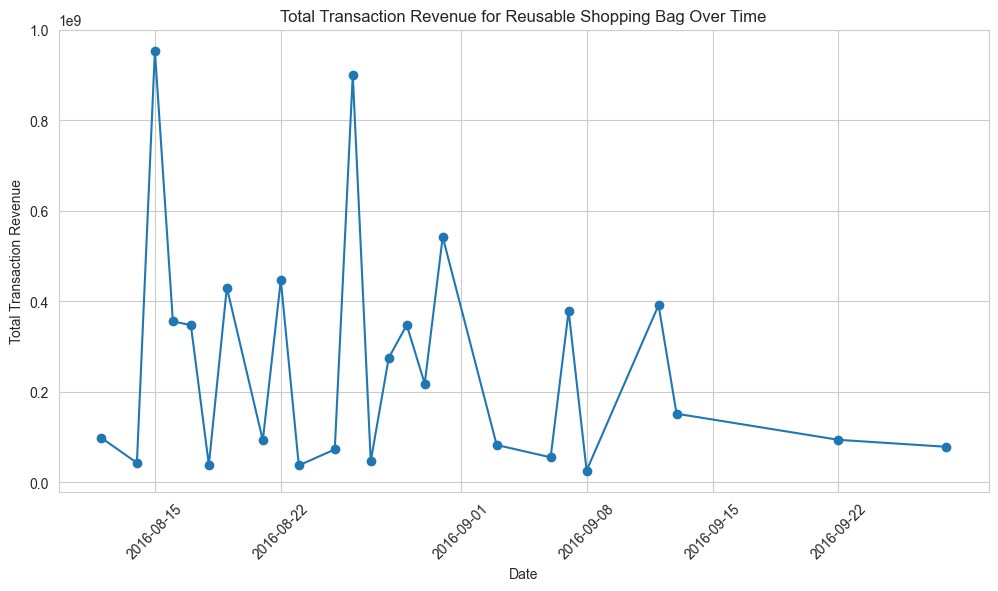

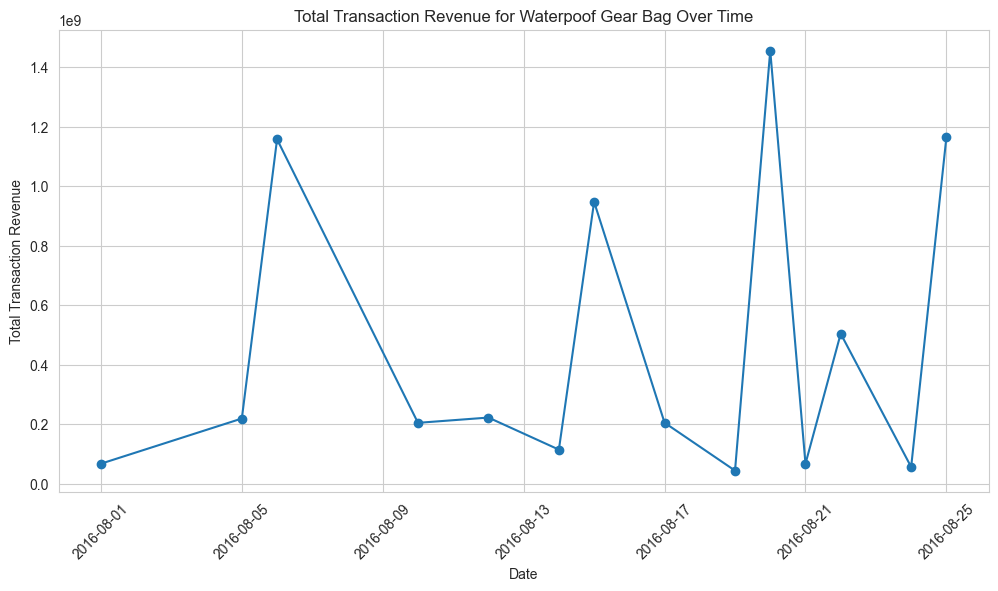

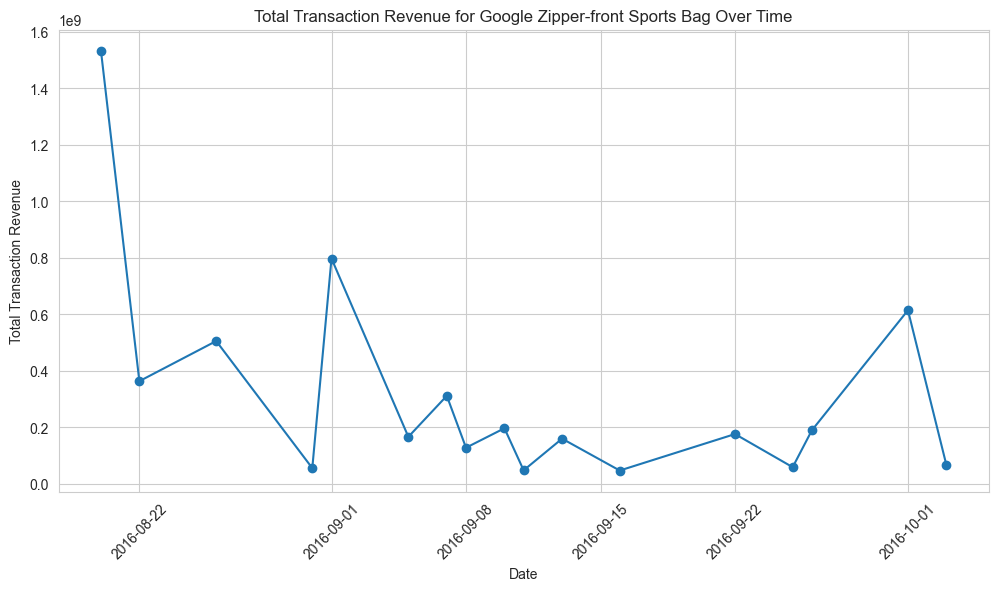

In [19]:
# Melihat anomali dari line chart
for product in top_products:
    product_data = product_revenue_per_day[product_revenue_per_day['v2ProductName'] == product]
    
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    plt.plot(product_data['date'], product_data['totalTransactionRevenue'], marker='o', linestyle='-')
    
    plt.title(f'Total Transaction Revenue for {product} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Transaction Revenue')
    plt.xticks(rotation=45)
    
    plt.show()

Terdapat beberapa anomali yang terdeteksi dalam data transaksi, sebagai berikut:

- **Google Tote Bag** pada bulan Agustus: Terjadi fluktuasi yang signifikan dalam jumlah transaksi produk ini selama bulan Agustus.
- **Collapsible Shopping Bag** pada bulan Agustus: Ada lonjakan atau penurunan drastis dalam transaksi produk ini pada bulan Agustus.
- **Sport Bag** pada bulan Agustus: Terlihat adanya perubahan yang mencolok dalam jumlah transaksi produk ini di bulan Agustus.
- **Electronics Accessory Pouch** pada bulan September: Terdapat anomali pada transaksi produk ini di bulan September, baik dalam bentuk peningkatan atau penurunan yang tidak biasa.
- **Zipper-front Sports Bags** pada bulan Agustus: Terdapat ketidakteraturan atau perubahan signifikan dalam transaksi produk ini selama bulan Agustus.

Perubahan ini dapat menunjukkan adanya isu atau peristiwa khusus yang mempengaruhi penjualan produk-produk tersebut. Disarankan untuk melakukan analisis lebih lanjut untuk memahami penyebab dan implikasi dari anomali ini.

# **3. Identify the most profitable city or province based on the total transaction revenue**

In [20]:
# Duplikasi data
df3 = df1.copy()

df3.head()

,fullVisitorId,channelGrouping,time,country,city,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,date,visitId,type,productRefundAmount,productQuantity,productPrice,productRevenue,productSKU,v2ProductName,v2ProductCategory,productVariant,currencyCode,itemQuantity,itemRevenue,transactionRevenue,transactionId,pageTitle,searchKeyword,pagePathLevel1,eCommerceAction_type,eCommerceAction_step,eCommerceAction_option
0,2515546493837534633,Organic Search,966564,Taiwan,(not set),NaN,NaN,1567.0,82.0,17.0,2017-07-21,1500643403,PAGE,NaN,NaN,0,NaN,9180781,Suitcase Organizer Cubes,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
1,9361741997835388618,Organic Search,157377,France,not available in demo dataset,NaN,NaN,321.0,8.0,NaN,2017-04-13,1492114470,PAGE,NaN,NaN,0,NaN,9180793,26 oz Double Wall Insulated Bottle,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
2,7313828956068851679,Referral,228279,United States,San Francisco,NaN,NaN,927.0,11.0,63.0,2017-07-27,1501198444,PAGE,NaN,NaN,0,NaN,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
3,6036794406403793540,Organic Search,1615618,United States,Boulder,NaN,NaN,1616.0,13.0,38.0,2017-07-31,1501522359,PAGE,NaN,NaN,0,NaN,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
4,7847280609739507227,Organic Search,37832,Canada,not available in demo dataset,NaN,NaN,1222.0,45.0,53.0,2017-07-28,1501300311,PAGE,NaN,NaN,0,NaN,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN


In [21]:
# Melakukan Group data by date and product name and sum totalTransactionRevenue
df3 = df1.copy()
profitable_location = df3.groupby(['country', 'city'])['totalTransactionRevenue'].sum().reset_index()
profitable_location.sort_values('totalTransactionRevenue', ascending=False)

,country,city,totalTransactionRevenue
300,United States,not available in demo dataset,5.418467e+10
271,United States,New York,2.125081e+10
287,United States,San Francisco,7.774340e+09
305,Venezuela,not available in demo dataset,7.191120e+09
270,United States,Mountain View,5.713290e+09
...,...,...,...
105,Israel,not available in demo dataset,0.000000e+00
104,Israel,Tel Aviv-Yafo,0.000000e+00
103,Isle of Man,(not set),0.000000e+00
102,Ireland,not available in demo dataset,0.000000e+00


Saya akan mengidentifikasi negara dengan pendapatan tertinggi dan kemudian melakukan analisis lebih mendalam terhadap kota-kota di negara tersebut. Strategi ini sangat berharga bagi perusahaan untuk mengoptimalkan kehadiran pasar dan menyesuaikan upayanya secara lebih efektif. Dengan cara ini, perusahaan dapat meningkatkan pendapatan dan pertumbuhan secara keseluruhan.

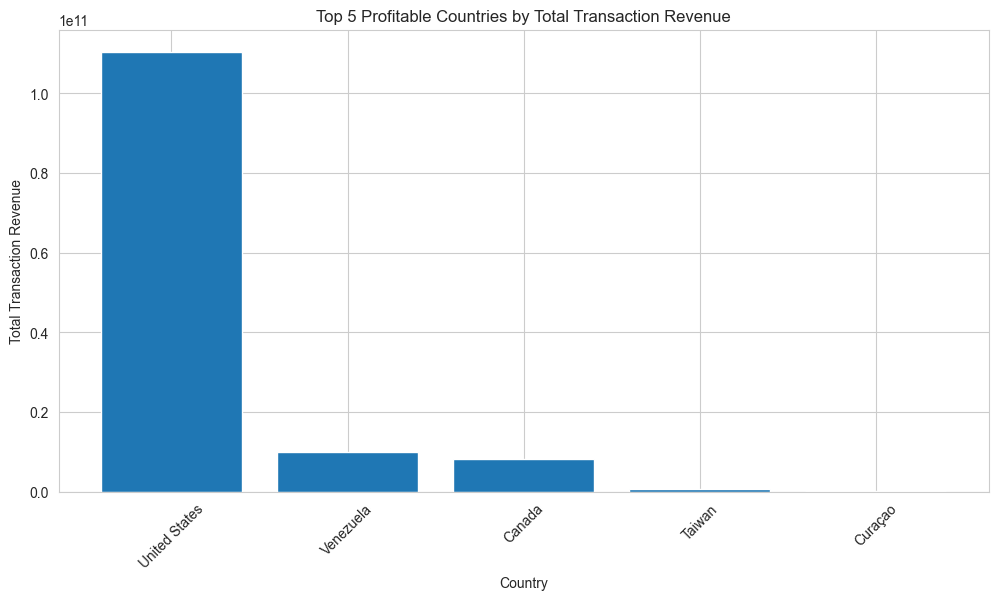

In [23]:
# Melakukan group data by 'country' and sum total transaction revenue
country_revenue = profitable_location.groupby('country')['totalTransactionRevenue'].sum().reset_index()

# Memilih data berdasarkan yang paling tinggi
country_revenue = country_revenue.sort_values(by='totalTransactionRevenue', ascending=False)

# Menampilkan 10 negara
top_10_countries = country_revenue.head(5)

# Menampikan hasil visualisasi
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['country'], top_10_countries['totalTransactionRevenue'])
plt.title('Top 5 Profitable Countries by Total Transaction Revenue')
plt.xlabel('Country')
plt.ylabel('Total Transaction Revenue')
plt.xticks(rotation=45)
plt.show()

Dominasi Amerika Serikat: Amerika Serikat secara signifikan mendominasi daftar negara dengan pendapatan transaksi tertinggi. Pendapatan transaksi dari Amerika Serikat jauh lebih besar dibandingkan dengan negara-negara lainnya. Ini menunjukkan bahwa pasar Amerika Serikat merupakan pasar yang sangat penting dan potensial bagi bisnis ini.

Perbedaan yang Signifikan: Terdapat perbedaan yang sangat signifikan antara pendapatan transaksi Amerika Serikat dengan negara-negara lainnya. Venezuela berada di posisi kedua, namun pendapatan transaksinya masih jauh di bawah Amerika Serikat. Ini menunjukkan adanya konsentrasi pendapatan yang sangat tinggi di Amerika Serikat.

Potensi Pasar Lain: Meskipun Amerika Serikat mendominasi, negara-negara seperti Venezuela, Kanada, Taiwan, dan Curacao juga memiliki kontribusi terhadap total pendapatan. Ini menunjukkan adanya potensi pasar di negara-negara tersebut, meskipun skalanya masih jauh di bawah Amerika Serikat.

In [24]:
# Menampilkan kota mana yang paling profitable
us = profitable_location[profitable_location['country']== 'United States']

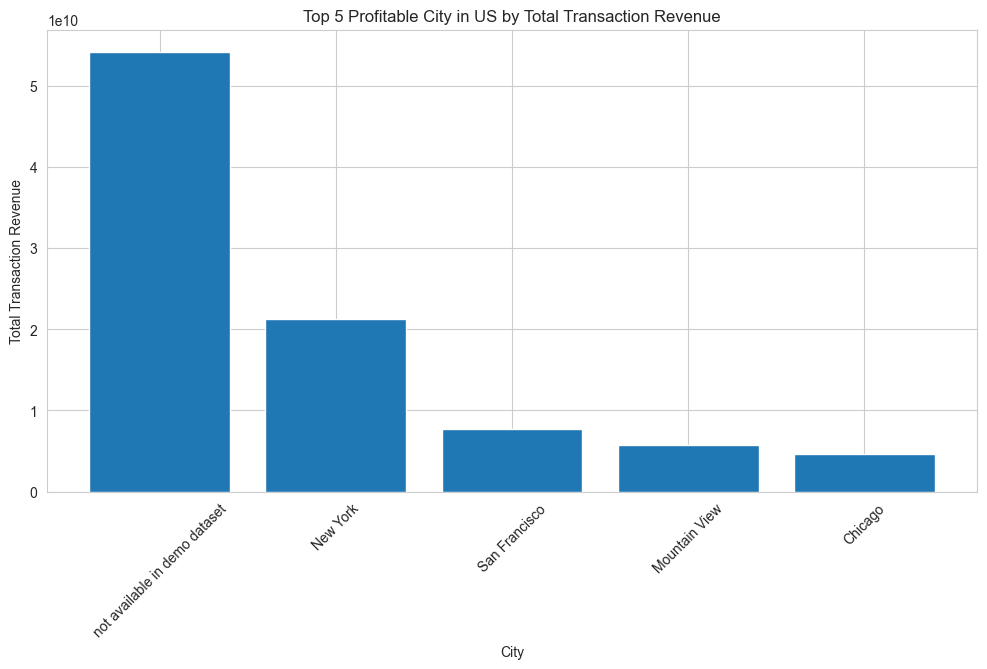

In [25]:
city_us = us.groupby('city')['totalTransactionRevenue'].sum().reset_index()
city_us = city_us.sort_values(by='totalTransactionRevenue', ascending=False)

# Hanya menampilkan 5 kota
top_5_city = city_us.head(5)

# Menampilkan bar chart 5 kota di us yang paling profitable
plt.figure(figsize=(12, 6))
plt.bar(top_5_city['city'], top_5_city['totalTransactionRevenue'])
plt.title('Top 5 Profitable City in US by Total Transaction Revenue')
plt.xlabel('City')
plt.ylabel('Total Transaction Revenue')
plt.xticks(rotation=45)
plt.show()

**Kesimpulan:**

- Dominasi Kota Besar: Kota-kota besar seperti New York, San Francisco, Mountain View, dan Chicago mendominasi daftar kota dengan pendapatan transaksi tertinggi. Ini menunjukkan bahwa kota-kota besar merupakan pusat ekonomi dan bisnis yang signifikan di Amerika Serikat.
- Konsentrasi Pendapatan di Beberapa Kota: Sebagian besar pendapatan transaksi terkonsentrasi di beberapa kota besar. Ini mengindikasikan adanya ketidakmerataan dalam distribusi pendapatan di seluruh wilayah Amerika Serikat.
- Perbedaan yang Signifikan: Terdapat perbedaan yang signifikan antara pendapatan transaksi kota New York dengan kota-kota lainnya. Ini menunjukkan bahwa New York memiliki peran yang sangat penting dalam perekonomian Amerika Serikat.

**Rekomendasi:**

- Fokus pada Kota Besar: Perusahaan sebaiknya memfokuskan upaya pemasaran dan penjualan di kota-kota besar seperti New York, San Francisco, Mountain View, dan Chicago.
- Ekspansi ke Kota Lain: Meskipun kota-kota besar memiliki potensi yang besar, perusahaan juga perlu mempertimbangkan untuk melakukan ekspansi ke kota-kota lain yang sedang berkembang.